In [ ]:
#The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the
MNIST dataset. It is a dataset comprised of 60,000 small square 28×28 pixel grayscale
images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The
mapping of all 0-9 integers to class labels is listed below.
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot
Create a convolutional neural network (CNN) architecture to classify the ten different types
of objects present in the fashion MNIST dataset

In [ ]:
#import libraries

In [1]:
import numpy as np


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [ ]:
#load dataset and train test split

In [5]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [ ]:
#print first element in trainX

In [6]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
trainy[0]

9

In [ ]:
#above shows that corresponding values of class 9 is at first element in trainX

In [ ]:
#plot the first item in trainX

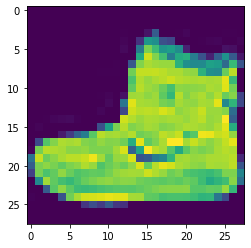

In [8]:
plt.imshow(trainX[0])

In [ ]:
#that is,ankle boot is the class 9 item and it is plot in color by matplotlib.Actually it is a grey color imageset.

In [ ]:
#plot this image to grey color

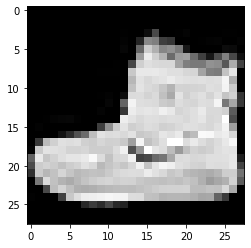

In [9]:
plt.imshow(trainX[0],cmap = 'gray')

In [ ]:
#plot the first 25 items and their classes.

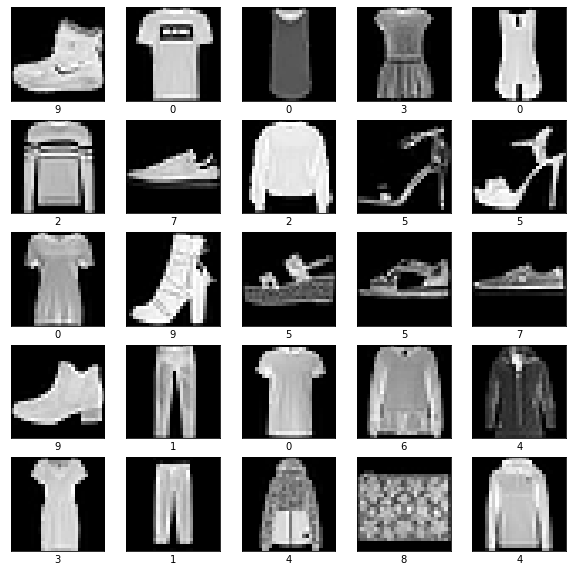

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap='gray')
   
    plt.xlabel(trainy[i])
plt.show()

In [ ]:
#devide trainX and testX by 255 for scale it to values between 0 and 1.
#it helps to to reduce the training time

In [11]:
trainX = trainX / 255
testX = testX / 255

In [ ]:
#print first element in trainX

In [12]:
print(trainX[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [ ]:
# each image have 28 rows and 28 columns.we give these image as input.so we want give 28*28=784 vector value.for that we doing some flattening operations.

In [17]:
trainX.shape

(60000, 28, 28)

In [18]:
testX.shape

(10000, 28, 28)

In [13]:
trainX_flattened = trainX.reshape(len(trainX), 28*28)
testX_flattened = testX.reshape(len(testX), 28*28)

In [15]:
trainX_flattened.shape

(60000, 784)

In [16]:
testX_flattened.shape

(10000, 784)

In [ ]:
#so we get  one dimensional array form

In [ ]:
#we pass these 784 values as input of neural network.

In [ ]:
#we do a 10 class classification

In [ ]:
#do y values by one hot encoding using to_categorical function.so get class values to either 0 or 1.

In [19]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [20]:
trainy[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [21]:
testy [0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
#we create a neural network have 32 hidden layer and 10 output neuron

In [ ]:
#actvation function relu help to pass the negative values to zero and positive values in the same values(positive)

In [ ]:
#activation function softmax help to sum all the 10 values to value=1

In [22]:
model = Sequential()
model.add(layers.Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile the model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#fit the model

In [25]:
history = model.fit(trainX_flattened, trainy,validation_data=(testX_flattened, testy),  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5500 - accuracy: 0.8120 - val_loss: 0.4537 - val_accuracy: 0.8432
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4161 - accuracy: 0.8537 - val_loss: 0.4292 - val_accuracy: 0.8524
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3828 - accuracy: 0.8640 - val_loss: 0.4104 - val_accuracy: 0.8543
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3599 - accuracy: 0.8712 - val_loss: 0.4177 - val_accuracy: 0.8477
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3471 - accuracy: 0.8756 - val_loss: 0.3948 - val_accuracy: 0.8576
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3307 - accuracy: 0.8809 - val_loss: 0.3785 - val_accuracy: 0.8673
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.8846 - val_loss: 0.3703 - val_accuracy:

In [ ]:
#we get validation accuracy of 87%

In [ ]:
#plot the accuracy and val_accuracy

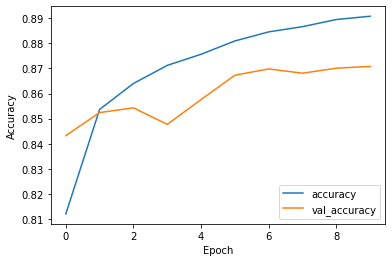

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [ ]:
#we extract some features in images using 32 neurons and then it flattened to a  ----it means that it has 3*3 kernel.
#single vector.
#Conv2D(32, (3, 3) ----it means that it has 3*3 kernel.
#input_shape=(28, 28, 1)----it means that it has 28*28 pixels in one dimension.
#we create a neural network have 32 hidden layer and 10 output neuron.

In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile this model

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the data without flattened but one hot encoded data

In [29]:
history = model.fit(trainX, trainy, epochs=10,  validation_data=(testX, testy), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4338 - accuracy: 0.8477 - val_loss: 0.3305 - val_accuracy: 0.8862
Epoch 2/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2931 - accuracy: 0.8957 - val_loss: 0.2931 - val_accuracy: 0.8948
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2540 - accuracy: 0.9085 - val_loss: 0.2831 - val_accuracy: 0.8954
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2284 - accuracy: 0.9168 - val_loss: 0.2698 - val_accuracy: 0.9058
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2083 - accuracy: 0.9252 - val_loss: 0.2912 - val_accuracy: 0.8941
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1875 - accuracy: 0.9315 - val_loss: 0.2665 - val_accuracy: 0.9085
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1698 - accuracy: 0.9386 - val_loss: 0.2675 - v

In [ ]:
#we get validation accuracy of 90.49%

In [ ]:
#so get 3% increase in accuracy by adding a single convolutional network.

In [ ]:
#plot the accuracy

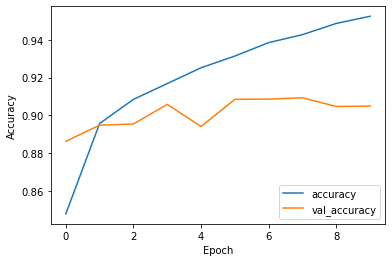

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [32]:
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip  install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
#evaluate model by passing test values.

In [36]:
test_loss, test_acc = model.evaluate(testX,  testy, verbose=2)

313/313 - 1s - loss: 0.3053 - accuracy: 0.9049 - 892ms/epoch - 3ms/step


In [ ]:
#we get accuracy of 90.49%

In [ ]:
#plot the 1000 nth element in test values.

([], [])

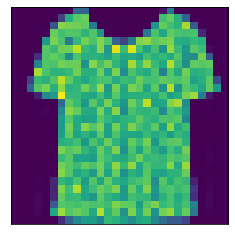

In [38]:
plt.imshow(testX[1000])
plt.xticks([])
plt.yticks([])

In [ ]:
#print 1000 nth label

In [39]:
print(testy[1000])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#it shows that class is zero

In [ ]:
#print the name of class zero item

In [43]:
class_names[0]

'T-shirt/top'

In [ ]:
#y_pred

In [50]:
sample = testX[1000].reshape(1,28,28)
y_pred = model.predict(sample)

1/1 [==============================] - 0s 20ms/step


In [52]:
y_pred

array([[5.2295727e-01, 2.1486572e-05, 3.8730314e-03, 1.1595716e-03,
        1.2752408e-06, 1.5564441e-09, 4.7198731e-01, 8.0249946e-10,
        6.7496721e-08, 1.2635039e-09]], dtype=float32)

In [ ]:
#to find maximum value at which position in the array

In [53]:
np.argmax(y_pred)

0

In [47]:
class_names[0]

'T-shirt/top'

In [ ]:
#it show that our machine learning algorithm coreectly classified this image as T-shirt/top.